In [3]:
import pandas as pd
import numpy as np
import random

df = pd.read_csv('heart_cleaned.csv')

np.random.seed(42)
random.seed(42)

In [4]:
df.select_dtypes(include='object').nunique()

,0
Sex,2
ChestPainType,4
RestingECG,3
ExerciseAngina,2
ST_Slope,3


In [5]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_imputed
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0


In [7]:
# Encodage binaire : Sexe (M/F) et ExerciseAngina (Y/N)
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N': 0, 'Y': 1})

# Encodage ordonné manuel : ChestPainType
chest_pain_order = {'ATA': 0, 'NAP': 1, 'ASY': 2}
df['ChestPainType'] = df['ChestPainType'].map(chest_pain_order)

# Encodage ordonné manuel : ST_Slope
st_slope_order = {'Up': 0, 'Flat': 1, 'Down': 2}
df['ST_Slope'] = df['ST_Slope'].map(st_slope_order)

# Encodage ordinal manuel pour la variable RestingECG :
#resting_ecg_order = {'Normal': 0, 'ST': 1, 'LVH': 2}
#df['RestingECG'] = df['RestingECG'].map(resting_ecg_order)

In [8]:
# Encodage one-hot : RestingECG (garde une seule colonne en moins pour éviter la colinéarité)
df = pd.get_dummies(df, columns=['RestingECG'], drop_first=True)

In [9]:
from sklearn.preprocessing import StandardScaler

# Liste des colonnes numériques continues à standardiser
cols_to_scale = ['Age', 'RestingBP', 'Cholesterol_imputed', 'MaxHR', 'Oldpeak']

# Création d’un scaler
scaler = StandardScaler()

# Application du scaler
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [10]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_imputed,RestingECG_Normal,RestingECG_ST
0,-1.433140,0,0.0,0.415002,289,0,1.382928,0,-0.875154,0,0,-0.48017,True,False
1,-0.478484,1,1.0,1.527329,180,0,0.754157,0,0.086761,1,1,-0.48017,True,False
2,-1.751359,0,0.0,-0.141161,283,0,-1.525138,0,-0.875154,0,0,-0.48017,False,True
3,-0.584556,1,2.0,0.303769,214,0,-1.132156,1,0.567718,1,1,-0.48017,True,False
4,0.051881,0,1.0,0.971166,195,0,-0.581981,0,-0.875154,0,0,-0.48017,True,False


In [11]:
from sklearn.model_selection import train_test_split

# 1. Définir X et y
X = df.drop(columns=['HeartDisease'])  # toutes les colonnes sauf la cible
y = df['HeartDisease']                 # la cible

# 2. Séparer en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#stratify=y: Pour que la distribution de la classe cible (HeartDisease) soit équilibrée entre l'entraînement et le test.

# Afficher les dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))
print("y_test distribution:\n", y_test.value_counts(normalize=True))

X_train shape: (734, 13)
X_test shape: (184, 13)
y_train distribution:
 HeartDisease
1    0.553134
0    0.446866
Name: proportion, dtype: float64
y_test distribution:
 HeartDisease
1    0.554348
0    0.445652
Name: proportion, dtype: float64


In [12]:
#aamalt regression lineaire jetni erreur car ChestPainType feha 40 valeurs nulles !

In [13]:
X_train.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,40
RestingBP,0
Cholesterol,0
FastingBS,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0
ST_Slope,0


In [14]:
from sklearn.impute import SimpleImputer

imputer_cat = SimpleImputer(strategy='most_frequent')
X_train['ChestPainType'] = imputer_cat.fit_transform(X_train[['ChestPainType']])
X_test['ChestPainType'] = imputer_cat.transform(X_test[['ChestPainType']])

In [15]:
X_train.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0
ST_Slope,0


# **Régression Logistique**

### Entraînement et évaluation du modèle

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, classification_report

# 1. Initialiser le modèle
log_reg = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')  # liblinear fonctionne bien pour les petits datasets

# 2. Entraîner le modèle
log_reg.fit(X_train, y_train)

# 3. Prédictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # probabilités pour la classe 1

# 4. Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.875
Recall: 0.9215686274509803
AUC: 0.9097321855571496

Confusion Matrix:
 [[67 15]
 [ 8 94]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85        82
           1       0.86      0.92      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



In [ ]:
!pip install shap
import shap

In [17]:
import shap

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# 1. Pipeline avec imputation et modèle
imputer = SimpleImputer(strategy='mean')
log_reg = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)  # liblinear pour petits datasets

pipe = Pipeline([
    ('imputer', imputer),
    ('log_reg', log_reg)
])

# 2. Validation croisée sur les données d'entraînement
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipe, X_train, y_train, cv=kf, scoring='accuracy')
print("Scores validation croisée :", cv_scores)
print("Accuracy moyenne :", cv_scores.mean())
print("Écart-type :", cv_scores.std())
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i} - Accuracy : {score:.4f}")

Scores validation croisée : [0.83673469 0.86394558 0.86394558 0.85714286 0.8630137 ]
Accuracy moyenne : 0.8569564812226261
Écart-type : 0.010424396923832386
Fold 1 - Accuracy : 0.8367
Fold 2 - Accuracy : 0.8639
Fold 3 - Accuracy : 0.8639
Fold 4 - Accuracy : 0.8571
Fold 5 - Accuracy : 0.8630


In [19]:
from sklearn.model_selection import GridSearchCV

# 3. Recherche des meilleurs hyperparamètres

param_grid = {
    'log_reg__C': [0.01, 0.1, 1, 10, 100],  # paramètre de régularisation
    'log_reg__solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(pipe, param_grid, cv=kf, scoring='accuracy')
grid.fit(X_train, y_train)

print("Meilleurs paramètres :", grid.best_params_)
print("Meilleure score CV :", grid.best_score_)

Meilleurs paramètres : {'log_reg__C': 10, 'log_reg__solver': 'lbfgs'}
Meilleure score CV : 0.8596868884540116


In [20]:
best_model = grid.best_estimator_

In [21]:
# 4. Évaluation finale sur le test set

y_pred_log = best_model.predict(X_test)
y_prob_log = best_model.predict_proba(X_test)[:, 1]

print("\nÉvaluation du modèle de régression logistique :")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("Recall :", recall_score(y_test, y_pred_log))
print("AUC :", roc_auc_score(y_test, y_prob_log))
print("\nClassification Report :\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred_log))


Évaluation du modèle de régression logistique :
Accuracy : 0.8804347826086957
Recall : 0.9117647058823529
AUC : 0.9110473457675753

Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.84      0.86        82
           1       0.88      0.91      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

Confusion Matrix :
 [[69 13]
 [ 9 93]]


<ipython-input-22-d82c2b70e051>:15: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, features=X_test_imputed, feature_names=X.columns, plot_type="bar")


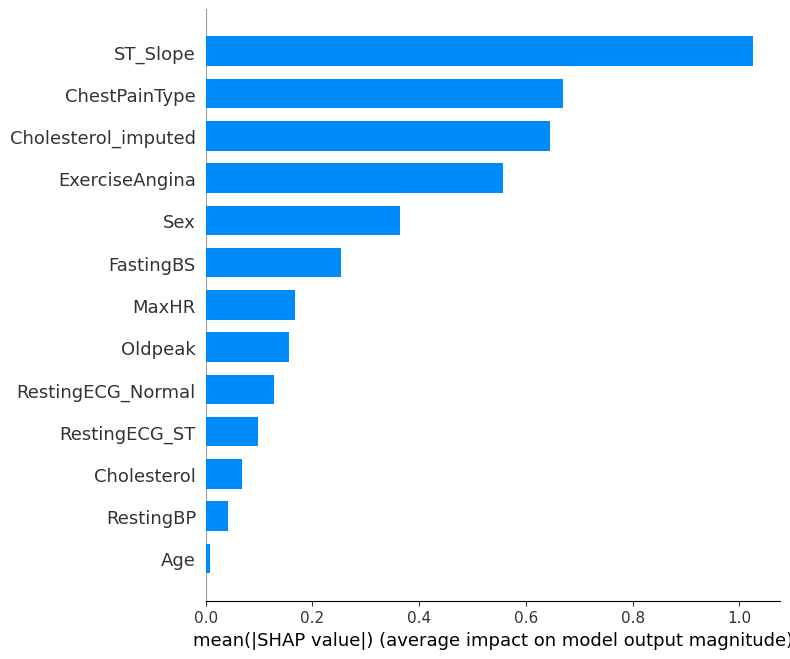

In [22]:
import shap
imputer_fitted = best_model.named_steps['imputer']

# Étape 1 : Appliquer manuellement l'imputation sur les données de test
X_test_imputed = imputer_fitted.transform(X_test)

# Étape 2 : Utiliser uniquement le modèle (pas tout le pipeline)
log_reg_model = best_model.named_steps['log_reg']

# Étape 3 : Créer l'explainer SHAP
explainer = shap.Explainer(log_reg_model, X_test_imputed)
shap_values = explainer(X_test_imputed)

# Étape 4 : Visualiser les résultats SHAP
shap.summary_plot(shap_values, features=X_test_imputed, feature_names=X.columns, plot_type="bar")

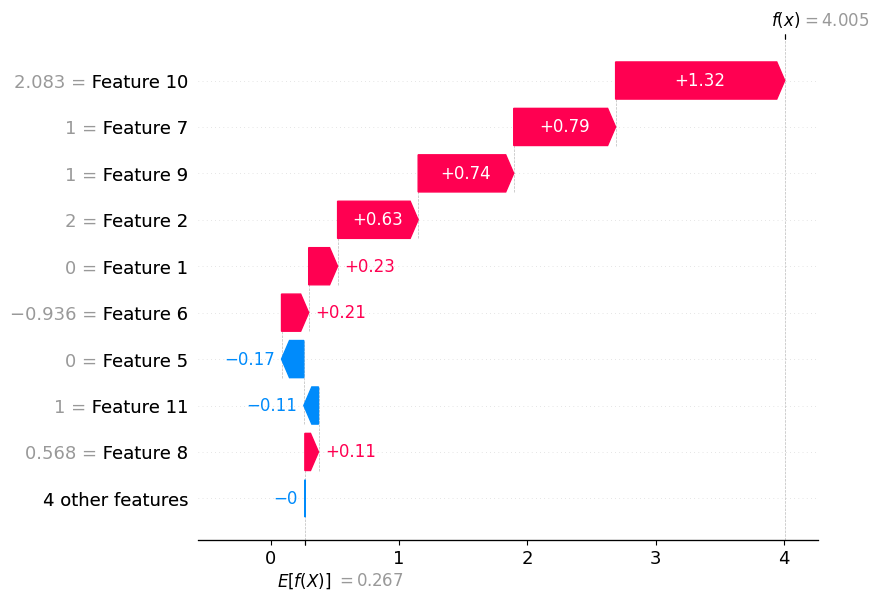

In [23]:
shap.plots.waterfall(shap_values[0])

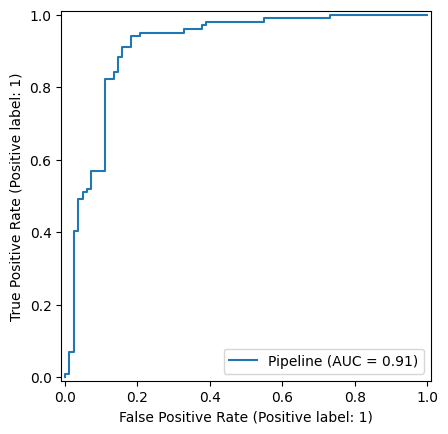

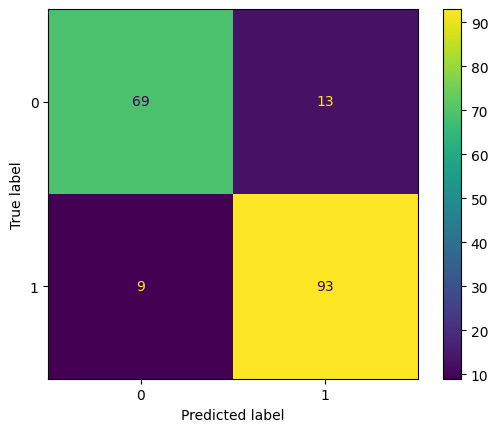

In [24]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

RocCurveDisplay.from_estimator(best_model, X_test, y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log)

In [25]:
import numpy as np

# Extraire les coefficients du modèle logistique
coefficients = log_reg_model.coef_[0]

# Noms des features
feature_names = X.columns

# Calcul des Odds Ratios
odds_ratios = np.exp(coefficients)

# Création du DataFrame des résultats
odds_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
}).sort_values(by='Odds Ratio', ascending=False)

print(odds_df)

                Feature  Coefficient  Odds Ratio
9              ST_Slope     1.772269    5.884188
7        ExerciseAngina     1.202837    3.329550
2         ChestPainType     0.936871    2.551984
10  Cholesterol_imputed     0.685529    1.984822
5             FastingBS     0.668220    1.950762
8               Oldpeak     0.183904    1.201900
3             RestingBP     0.054656    1.056177
0                   Age     0.010558    1.010614
4           Cholesterol     0.002103    1.002105
6                 MaxHR    -0.214104    0.807264
11    RestingECG_Normal    -0.260098    0.770976
12        RestingECG_ST    -0.306041    0.736356
1                   Sex    -1.126200    0.324263


<ipython-input-26-d9b01d6e966e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Odds Ratio', y='Feature', data=odds_df, palette='viridis')


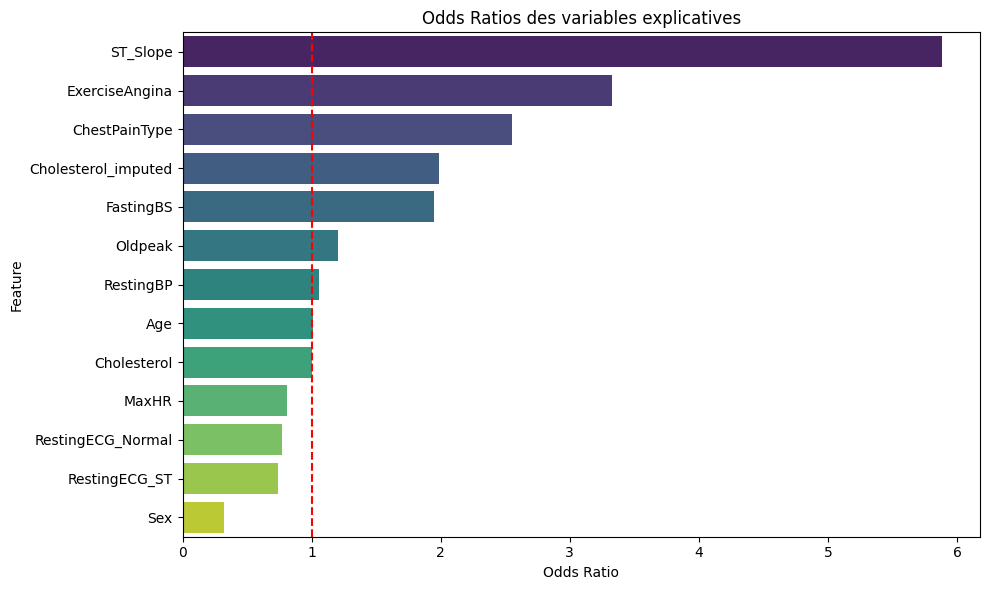

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Odds Ratio', y='Feature', data=odds_df, palette='viridis')
plt.title("Odds Ratios des variables explicatives")
plt.axvline(1, color='red', linestyle='--')
plt.tight_layout()
plt.show()

## **L'Arbre de décision**

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, classification_report, confusion_matrix

# 1. Initialisation du modèle
tree_clf = DecisionTreeClassifier(random_state=42)

# 2. Entraînement
tree_clf.fit(X_train, y_train)

# 3. Prédictions
y_pred_tree = tree_clf.predict(X_test)
y_prob_tree = tree_clf.predict_proba(X_test)[:, 1]

# 4. Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("AUC:", roc_auc_score(y_test, y_prob_tree))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

#j ai remarqué que l arbre de décision sera plus performant sans one-hot et sans scalling mais avec :
## Encodage ordinal manuel pour la variable RestingECG :
#resting_ecg_order = {'Normal': 0, 'ST': 1, 'LVH': 2}
#df['RestingECG'] = df['RestingECG'].map(resting_ecg_order)

Accuracy: 0.8097826086956522
Recall: 0.803921568627451
AUC: 0.8104973696795792

Confusion Matrix:
 [[67 15]
 [20 82]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79        82
           1       0.85      0.80      0.82       102

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184



In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
# ----- 1. Validation croisée sur le modèle de base -----
tree_clf = DecisionTreeClassifier(random_state=42)

cv_scores_tree = cross_val_score(tree_clf, X_train, y_train, cv=kf, scoring='accuracy')
print("Decision Tree - Accuracy moyenne (CV) :", cv_scores_tree.mean())
print("Écart-type (CV) :", cv_scores_tree.std())

Decision Tree - Accuracy moyenne (CV) : 0.7725002329699002
Écart-type (CV) : 0.02620891456659187


In [29]:
from sklearn.model_selection import GridSearchCV

# ----- 2. Optimisation des hyperparamètres -----
param_grid_tree = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=kf, scoring='accuracy', n_jobs=-1)
grid_tree.fit(X_train, y_train)

best_tree = grid_tree.best_estimator_
print("Meilleurs paramètres :", grid_tree.best_params_)
print("Meilleur score CV :", grid_tree.best_score_)

Meilleurs paramètres : {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Meilleur score CV : 0.8378902245829838


In [30]:
# ----- 3. Évaluation sur le test set -----
y_pred_tree = best_tree.predict(X_test)
y_prob_tree = best_tree.predict_proba(X_test)[:, 1]

print("\nÉvaluation de l’arbre de décision optimisé :")
print("Accuracy :", accuracy_score(y_test, y_pred_tree))
print("Recall :", recall_score(y_test, y_pred_tree))
print("AUC :", roc_auc_score(y_test, y_prob_tree))
print("\nClassification Report :\n", classification_report(y_test, y_pred_tree))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred_tree))


Évaluation de l’arbre de décision optimisé :
Accuracy : 0.8097826086956522
Recall : 0.8235294117647058
AUC : 0.8755380200860832

Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.79      0.79        82
           1       0.83      0.82      0.83       102

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184

Confusion Matrix :
 [[65 17]
 [18 84]]


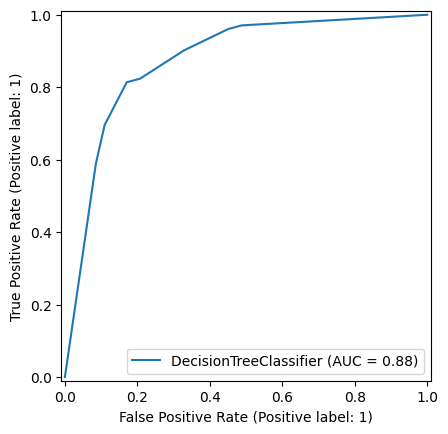

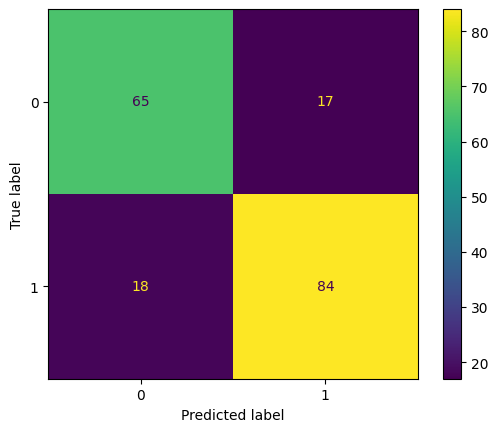

In [31]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

RocCurveDisplay.from_estimator(best_tree, X_test, y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree)

## **Random Forest**

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, classification_report

# 1. Initialisation du modèle
rf = RandomForestClassifier(random_state=42)

# 2. Entraînement
rf.fit(X_train, y_train)

# 3. Prédictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]  # Pour AUC

# 4. Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_proba_rf))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))



Accuracy: 0.875
Recall: 0.8725490196078431
AUC: 0.9351386896221904

Confusion Matrix:
 [[72 10]
 [13 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        82
           1       0.90      0.87      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



In [33]:
from sklearn.model_selection import cross_val_score

rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=kf, scoring='accuracy')
print("\nValidation croisée (modèle de base)")
print("Scores CV :", rf_cv_scores)
print("Accuracy moyenne :", rf_cv_scores.mean())
print("Écart-type :", rf_cv_scores.std())


Validation croisée (modèle de base)
Scores CV : [0.82993197 0.83673469 0.89795918 0.85714286 0.8630137 ]
Accuracy moyenne : 0.8569564812226261
Écart-type : 0.02390477344163796


In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)

print("\nMeilleurs paramètres :", grid_rf.best_params_)
print("Meilleur score CV :", grid_rf.best_score_)
best_rf = grid_rf.best_estimator_


Meilleurs paramètres : {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Meilleur score CV : 0.8637778399030844


In [35]:
y_pred_best_rf = best_rf.predict(X_test)
y_proba_best_rf = best_rf.predict_proba(X_test)[:, 1]

print("\nÉvaluation du modèle optimisé :")
print("Accuracy :", accuracy_score(y_test, y_pred_best_rf))
print("Recall :", recall_score(y_test, y_pred_best_rf))
print("AUC :", roc_auc_score(y_test, y_proba_best_rf))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_best_rf))
print("\nClassification Report :\n", classification_report(y_test, y_pred_best_rf))


Évaluation du modèle optimisé :
Accuracy : 0.9021739130434783
Recall : 0.9215686274509803
AUC : 0.9342419894787183

Matrice de confusion :
 [[72 10]
 [ 8 94]]

Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        82
           1       0.90      0.92      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



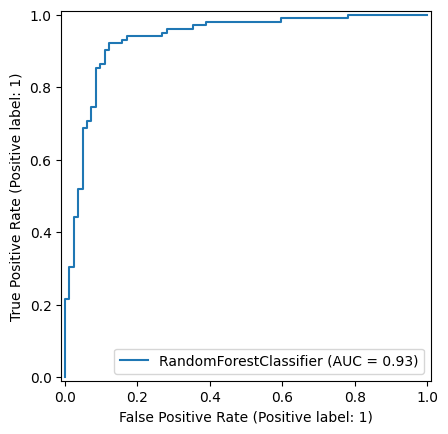

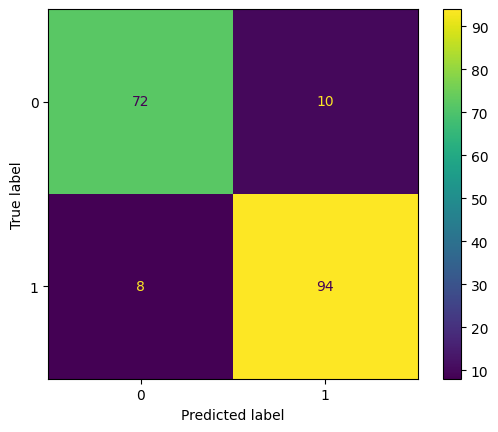

In [36]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

RocCurveDisplay.from_estimator(best_rf, X_test, y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best_rf)

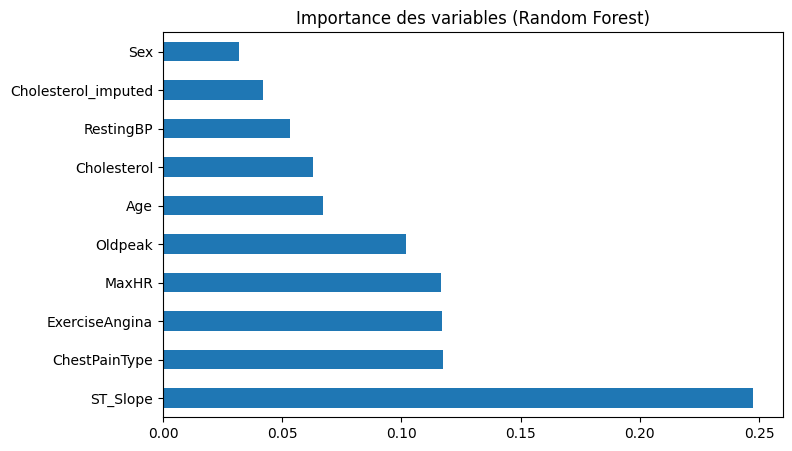

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = best_rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
plt.figure(figsize=(8, 5))
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Importance des variables (Random Forest)")
plt.show()

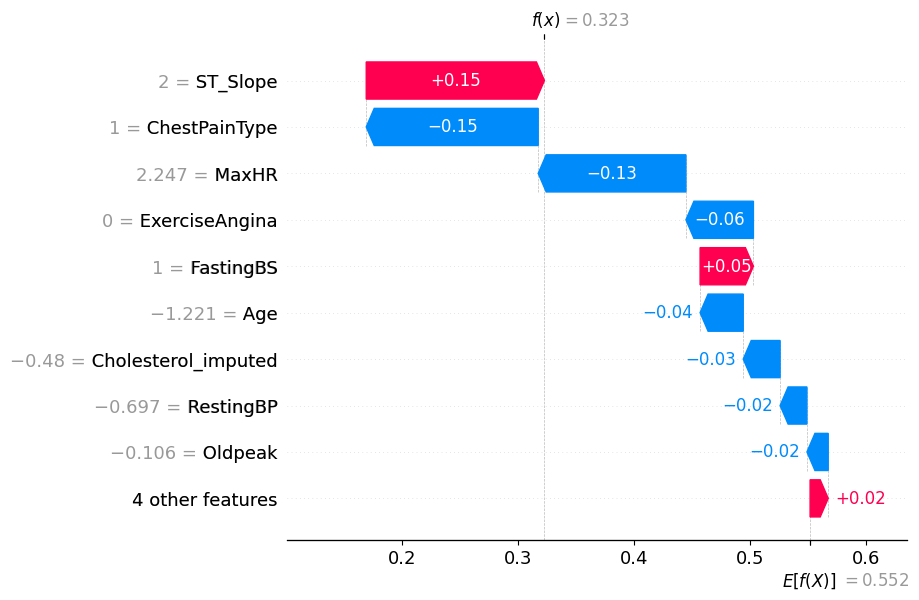

In [38]:
import numpy as np

feature_names = np.array(X.columns)

# ----- 6. Interprétabilité SHAP -----
explainer_rf = shap.Explainer(best_rf)
shap_values_rf = explainer_rf(X_test)

# Waterfall de la première instance et la classe positive (indice 1)
shap.plots.waterfall(shap_values_rf[5, :, 1])

## **XGBoost**

In [ ]:
!pip install xgboost

In [39]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, classification_report

# 1. Création du classificateur
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 2. Entraînement
xgb_model.fit(X_train, y_train)

# 3. Prédictions
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]  # pour AUC

# 4. Évaluation
print("Modèle de base XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("AUC:", roc_auc_score(y_test, y_prob_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


Modèle de base XGBoost
Accuracy: 0.8478260869565217
Recall: 0.8235294117647058
AUC: 0.9139167862266858

Confusion Matrix:
 [[72 10]
 [18 84]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        82
           1       0.89      0.82      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:44:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [40]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='accuracy')
print("\nValidation croisée :")
print("Scores :", scores)
print("Accuracy moyenne :", scores.mean())
print("Écart-type :", scores.std())

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:44:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:44:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:44:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Validation croisée :
Scores : [0.875      0.86956522 0.875      0.80874317 0.84699454]
Accuracy moyenne : 0.8550605844618675
Écart-type : 0.025361029332752243


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:44:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:44:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}

grid_xgb = GridSearchCV(
    estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    cv=kf,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)

# 7. Meilleur modèle optimisé
best_xgb = grid_xgb.best_estimator_
print("\nMeilleurs paramètres :", grid_xgb.best_params_)
print("Score CV du meilleur modèle :", grid_xgb.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits

Meilleurs paramètres : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
Score CV du meilleur modèle : 0.8651011089367253


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:44:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [42]:
# 8. Prédictions avec le modèle optimisé
y_pred_xgb_opt = best_xgb.predict(X_test)
y_prob_xgb_opt = best_xgb.predict_proba(X_test)[:, 1]

# 9. Évaluation finale du modèle optimisé
print("\nÉvaluation du modèle XGBoost optimisé")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_opt))
print("Recall:", recall_score(y_test, y_pred_xgb_opt))
print("AUC:", roc_auc_score(y_test, y_prob_xgb_opt))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_xgb_opt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_opt))


Évaluation du modèle XGBoost optimisé
Accuracy: 0.875
Recall: 0.8921568627450981
AUC: 0.9293400286944046

Matrice de confusion :
 [[70 12]
 [11 91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86        82
           1       0.88      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



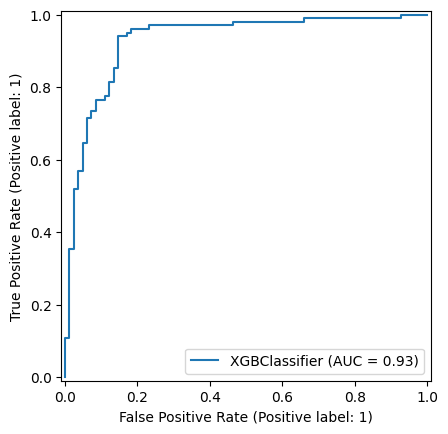

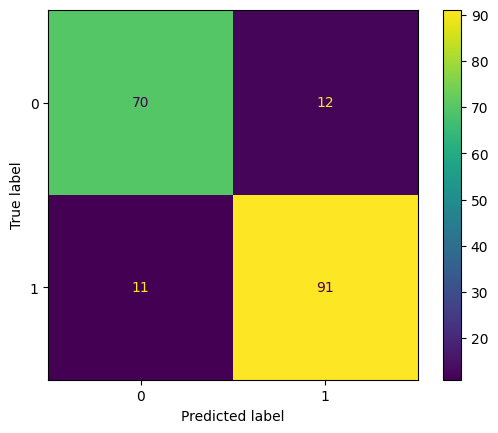

In [43]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

RocCurveDisplay.from_estimator(best_xgb, X_test, y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb_opt)

<ipython-input-44-0cf569990451>:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_xgb, X_test, plot_type="bar", show=True)


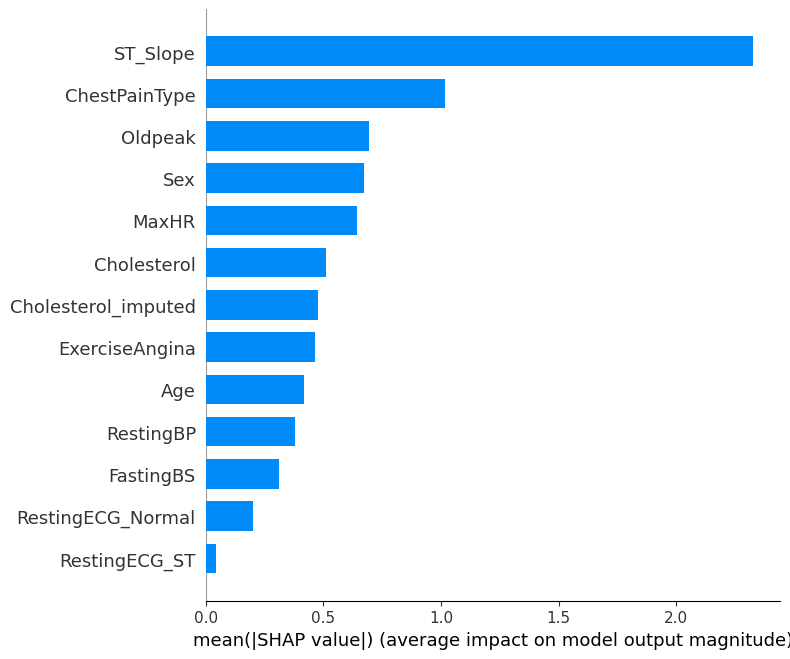

<ipython-input-44-0cf569990451>:7: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_xgb, X_test)


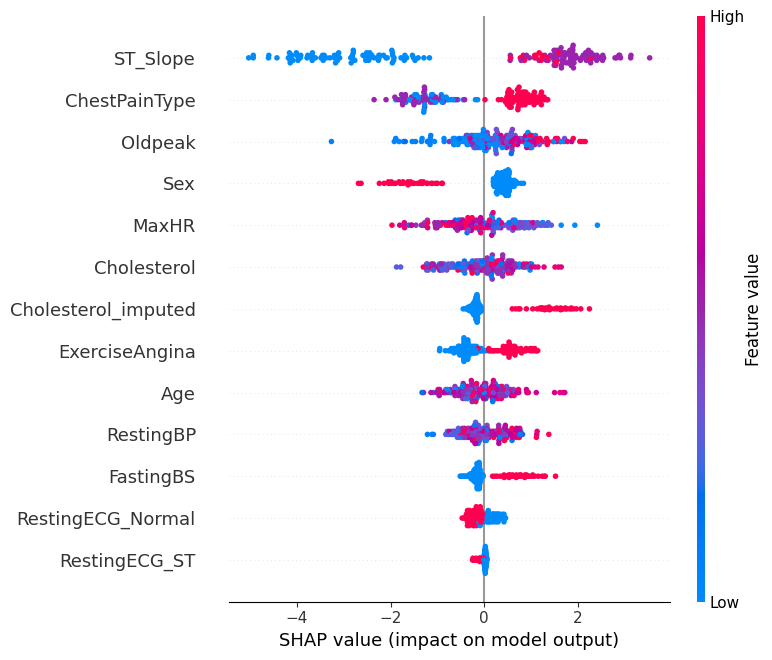

In [44]:
# 11. SHAP - Interprétation du modèle
explainer_xgb = shap.Explainer(xgb_model)
shap_values_xgb = explainer_xgb(X_test)

# Résumé global
shap.summary_plot(shap_values_xgb, X_test, plot_type="bar", show=True)
shap.summary_plot(shap_values_xgb, X_test)

## **K-NN**

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, recall_score

# 1. Créer et entraîner le modèle K-NN (par exemple avec k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 2. Prédictions
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:, 1]

# 3. Évaluation
print("Évaluation du KNN (k=5)")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("AUC:", roc_auc_score(y_test, y_proba_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

Évaluation du KNN (k=5)
Accuracy: 0.8097826086956522
Recall: 0.7941176470588235
AUC: 0.8472022955523673

Confusion Matrix:
 [[68 14]
 [21 81]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.80        82
           1       0.85      0.79      0.82       102

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184



In [46]:
from sklearn.model_selection import cross_val_score

acc_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
recall_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='recall')
print("\nValidation croisée :")
print("Accuracy moyenne :", acc_scores.mean())
print("Recall moyen :", recall_scores.mean())


Validation croisée :
Accuracy moyenne : 0.7424471158326343
Recall moyen : 0.7634748569707919


In [47]:
from sklearn.model_selection import GridSearchCV

# 5. GridSearchCV pour trouver le meilleur k
param_grid = {'n_neighbors': list(range(1, 21))}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=kf, scoring='accuracy')
grid_knn.fit(X_train, y_train)

# 6. Meilleur modèle
print("\nMeilleur k :", grid_knn.best_params_['n_neighbors'])
best_knn = grid_knn.best_estimator_


Meilleur k : 3


In [48]:
# 7. Prédictions du modèle optimisé
y_pred_knn_best = best_knn.predict(X_test)
y_proba_knn_best = best_knn.predict_proba(X_test)[:, 1]

# 8. Évaluation du modèle optimisé
print("\nÉvaluation du KNN optimisé")
print("Accuracy:", accuracy_score(y_test, y_pred_knn_best))
print("Recall:", recall_score(y_test, y_pred_knn_best))
print("AUC:", roc_auc_score(y_test, y_proba_knn_best))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_knn_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn_best))


Évaluation du KNN optimisé
Accuracy: 0.7989130434782609
Recall: 0.803921568627451
AUC: 0.8372190339550455

Matrice de confusion :
 [[65 17]
 [20 82]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.78        82
           1       0.83      0.80      0.82       102

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.80      0.80      0.80       184



In [ ]:
#on remarque que les résultats restent les meme donc la valeur par défaut était déjà optimale (k = 5)

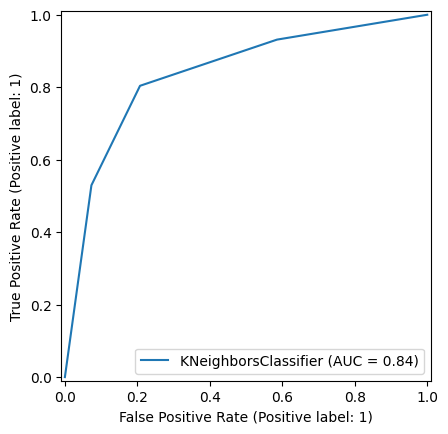

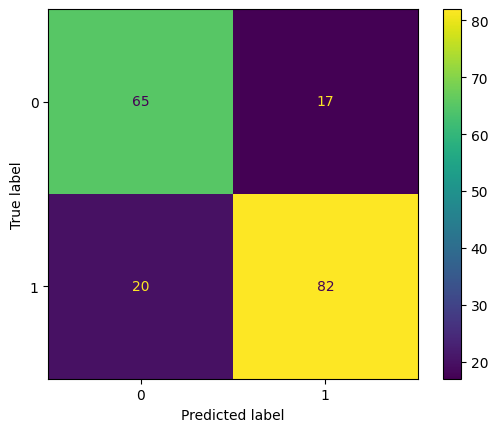

In [49]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

RocCurveDisplay.from_estimator(best_knn, X_test, y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn_best)

## **SVM**

In [50]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, classification_report

# 1. Initialiser le modèle SVM
svm_model = SVC(probability=True, kernel='rbf', random_state=42)

# 2. Entraîner le modèle
svm_model.fit(X_train, y_train)

# 3. Prédictions
y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# 3. Évaluation
print("SVM (standard)")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("AUC:", roc_auc_score(y_test, y_proba_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

SVM (standard)
Accuracy: 0.5489130434782609
Recall: 0.9901960784313726
AUC: 0.6856767097082735

Confusion Matrix:
 [[  0  82]
 [  1 101]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.55      0.99      0.71       102

    accuracy                           0.55       184
   macro avg       0.28      0.50      0.35       184
weighted avg       0.31      0.55      0.39       184



In [51]:
#il fait du surapprentissage (overfitting) sur la classe majoritaire dans l’ensemble d’entraînement
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Modèle SVM avec pondération des classes
svm_balanced = SVC(kernel='rbf', C=1, class_weight='balanced', probability=True, random_state=42)

# Entraînement
svm_balanced.fit(X_train, y_train)

# Prédictions
y_pred_svm_bal = svm_balanced.predict(X_test)
y_proba_svm_bal = svm_balanced.predict_proba(X_test)[:, 1]

# Évaluation
print("\nSVM (class_weight='balanced')")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_bal))
print("Recall:", recall_score(y_test, y_pred_svm_bal))
print("AUC:", roc_auc_score(y_test, y_proba_svm_bal))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_bal))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_bal))


SVM (class_weight='balanced')
Accuracy: 0.6086956521739131
Recall: 0.803921568627451
AUC: 0.6061692969870874

Confusion Matrix:
 [[30 52]
 [20 82]]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.37      0.45        82
           1       0.61      0.80      0.69       102

    accuracy                           0.61       184
   macro avg       0.61      0.58      0.57       184
weighted avg       0.61      0.61      0.59       184



In [52]:
# Important : normalisation des données pour SVM
svm_cv_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, kernel='rbf', random_state=42))
])

# Évaluation par validation croisée à 5 plis
cv_scores = cross_val_score(svm_cv_pipeline, X_train, y_train, cv=5, scoring='f1')

print("\nValidation croisée (5-fold CV)")
print("Scores F1 par pli :", cv_scores)
print("Score F1 moyen :", cv_scores.mean())


Validation croisée (5-fold CV)
Scores F1 par pli : [0.9047619  0.88622754 0.87951807 0.87272727 0.83428571]
Score F1 moyen : 0.8755041017948455


In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, classification_report

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, random_state=42))
])

# 1. Définir la grille des hyperparamètres
svm_params = {
    'svm__C': [0.1, 1, 10, 100],  # Paramètre de régularisation
    'svm__kernel': ['linear', 'rbf', 'poly'],  # Types de noyau
    'svm__gamma': ['scale', 'auto', 0.1, 0.01],  # Paramètre gamma pour noyaux RBF et poly
    'svm__class_weight': ['balanced', {0: 2, 1: 1}]  # Pondération des classes
}

# 2. Initialiser le modèle SVC (avec probability pour ROC)
#svm = SVC(probability=True, random_state=42)  deja fait dans svp_pipeline

# 3. GridSearchCV avec Cross Validation (cv=5)
grid_svm = GridSearchCV(
    svm_pipeline,
    svm_params,
    scoring='f1',
    cv=kf,
    n_jobs=-1
)

# 4. Entraînement du modèle
grid_svm.fit(X_train, y_train)

# Meilleurs paramètres et modèle optimisé
print("\nMeilleurs paramètres SVM :", grid_svm.best_params_)
best_svm = grid_svm.best_estimator_


Meilleurs paramètres SVM : {'svm__C': 1, 'svm__class_weight': 'balanced', 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


In [54]:
# 7. Prédictions
y_pred_svm_best = best_svm.predict(X_test)
y_proba_svm_best = best_svm.predict_proba(X_test)[:, 1]

# 8. Évaluation
print("\nSVM Optimisé - Résultats sur le test set :")
print("Accuracy :", accuracy_score(y_test, y_pred_svm_best))
print("Recall :", recall_score(y_test, y_pred_svm_best))
print("AUC :", roc_auc_score(y_test, y_proba_svm_best))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred_svm_best))
print("\nClassification Report :\n", classification_report(y_test, y_pred_svm_best))


SVM Optimisé - Résultats sur le test set :
Accuracy : 0.8695652173913043
Recall : 0.9019607843137255
AUC : 0.9288617886178863

Confusion Matrix :
 [[68 14]
 [10 92]]

Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.83      0.85        82
           1       0.87      0.90      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



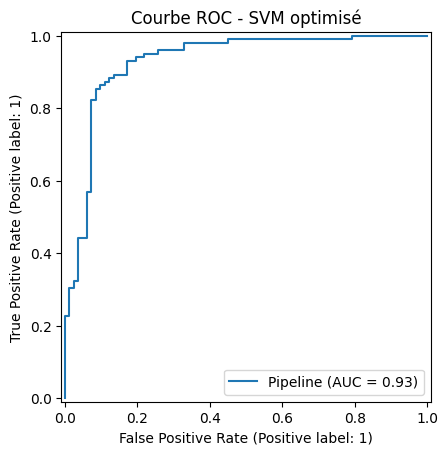

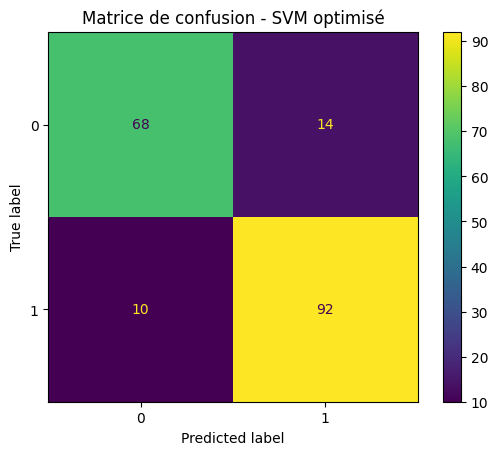

In [55]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
# 4. Visualisations
RocCurveDisplay.from_estimator(best_svm, X_test, y_test)
plt.title("Courbe ROC - SVM optimisé")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm_best)
plt.title("Matrice de confusion - SVM optimisé")
plt.show()

# **Visualisation globale**

In [56]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
import pandas as pd

# Liste de modèles (avec ou sans GridSearchCV)
model_list = [
    ('Logistic Regression', best_model),
    ('Decision Tree', best_tree),
    ('Random Forest', best_rf),
    ('XGBoost', best_xgb),
    ('KNN', best_knn),
    ('SVM', best_svm)
]

# Liste pour stocker les résultats
results = []

# Boucle sur les modèles
for name, model in model_list:
    # Si le modèle est un GridSearchCV, on prend best_estimator_
    if hasattr(model, 'best_estimator_'):
        final_model = model.best_estimator_
    else:
        final_model = model

    # Prédiction des classes
    y_pred = final_model.predict(X_test)

    # Prédiction des probabilités pour le calcul de l’AUC
    try:
        y_proba = final_model.predict_proba(X_test)[:, 1]
    except:
        # Pour SVM avec 'linear' kernel sans proba activée
        from sklearn.preprocessing import LabelBinarizer
        y_proba = LabelBinarizer().fit_transform(y_pred)

    # Calcul des métriques
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    # Ajout dans la liste
    results.append({
        'Modèle': name,
        'Accuracy': round(acc, 4),
        'F1 Score': round(f1, 4),
        'Recall': round(recall, 4),
        'Precision': round(precision, 4),
        'AUC': round(auc, 4)
    })

# Création du DataFrame final
df_results_auto = pd.DataFrame(results)

# Affichage avec mise en forme
df_results_auto.style.background_gradient(cmap='Blues', axis=1)

,Modèle,Accuracy,F1 Score,Recall,Precision,AUC
0,Logistic Regression,0.880400,0.894200,0.911800,0.877400,0.911000
1,Decision Tree,0.809800,0.827600,0.823500,0.831700,0.875500
2,Random Forest,0.902200,0.912600,0.921600,0.903800,0.934200
3,XGBoost,0.875000,0.887800,0.892200,0.883500,0.929300
4,KNN,0.798900,0.815900,0.803900,0.828300,0.837200
5,SVM,0.869600,0.884600,0.902000,0.867900,0.928900


In [57]:
df_results_auto.sort_values(by='AUC', ascending=False).style.background_gradient(cmap='Blues', axis=1)

,Modèle,Accuracy,F1 Score,Recall,Precision,AUC
2,Random Forest,0.902200,0.912600,0.921600,0.903800,0.934200
3,XGBoost,0.875000,0.887800,0.892200,0.883500,0.929300
5,SVM,0.869600,0.884600,0.902000,0.867900,0.928900
0,Logistic Regression,0.880400,0.894200,0.911800,0.877400,0.911000
1,Decision Tree,0.809800,0.827600,0.823500,0.831700,0.875500
4,KNN,0.798900,0.815900,0.803900,0.828300,0.837200


# Comparaison des modèles

# GRAPHIQUE COMPARATIF : Avant vs Après GridSearchCV

In [58]:
base_scores = {
    'Logistic Regression': {'accuracy': 0.87, 'recall': 0.92, 'f1': 0.89, 'auc': 0.91},
    'Decision Tree': {'accuracy': 0.81, 'recall': 0.80, 'f1': 0.82, 'auc': 0.81},
    'Random Forest': {'accuracy': 0.87, 'recall': 0.87, 'f1': 0.82, 'auc': 0.81},
    'XGBoost': {'accuracy': 0.85, 'recall': 0.82, 'f1': 0.86, 'auc': 0.91},
    'KNN': {'accuracy': 0.81, 'recall': 0.79, 'f1': 0.82, 'auc': 0.85},
    'SVM': {'accuracy': 0.55, 'recall': 0.99, 'f1': 0.71, 'auc': 0.68},
}

tuned_scores = {
    'Logistic Regression': {'accuracy': 0.88, 'recall': 0.91, 'f1': 0.89, 'auc': 0.91},
    'Decision Tree': {'accuracy': 0.81, 'recall': 0.82, 'f1': 0.83, 'auc': 0.87},
    'Random Forest': {'accuracy': 0.90, 'recall': 0.92, 'f1': 0.91, 'auc': 0.93},
    'XGBoost': {'accuracy': 0.87, 'recall': 0.89, 'f1': 0.89, 'auc': 0.93},
    'KNN': {'accuracy': 0.80, 'recall': 0.80, 'f1': 0.82, 'auc': 0.84},
    'SVM': {'accuracy': 0.87, 'recall': 0.90, 'f1': 0.88, 'auc': 0.93},
}

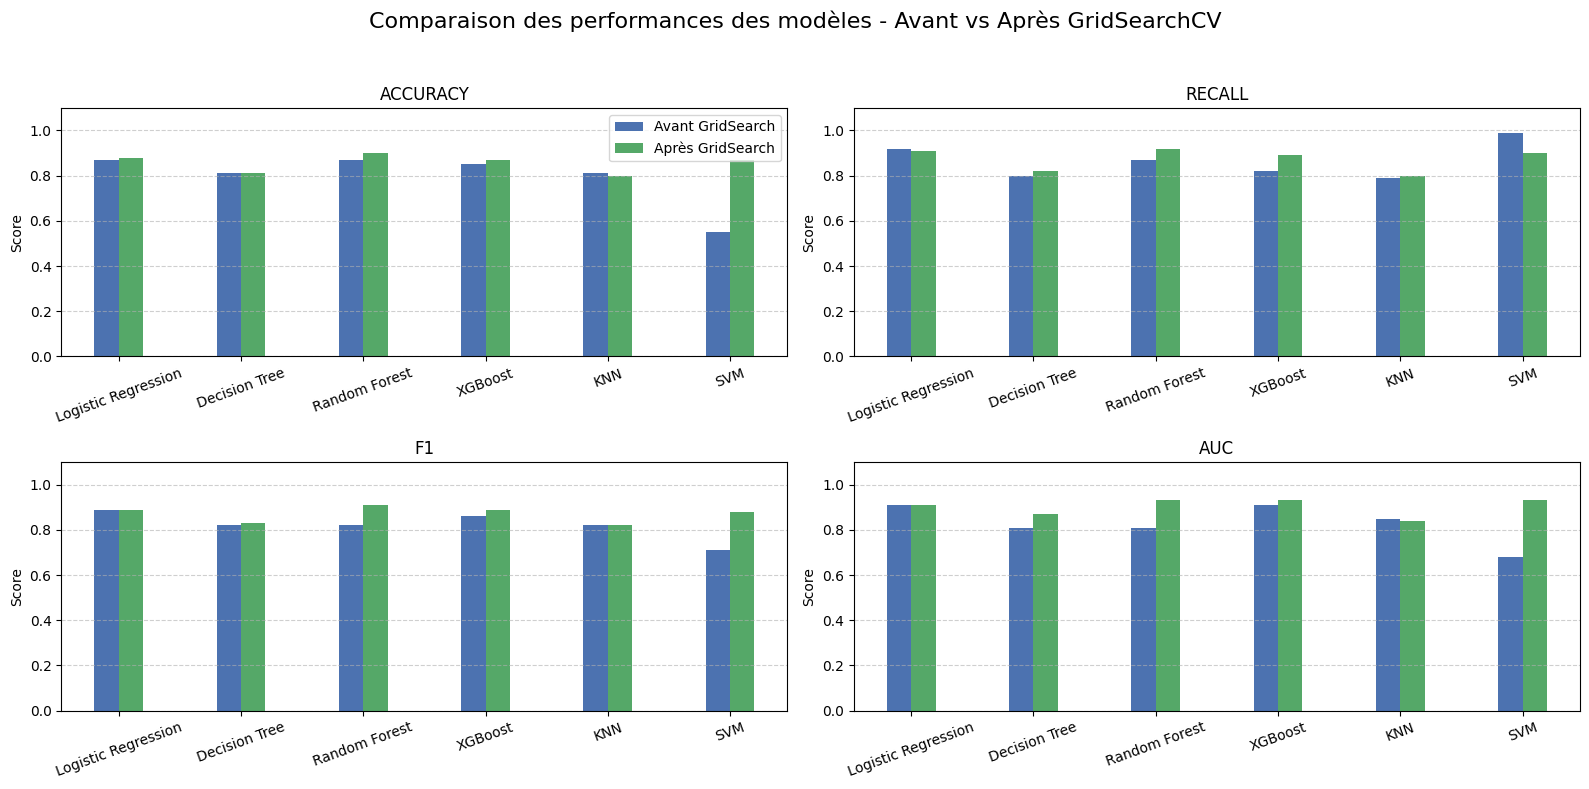

In [59]:
metrics = ['accuracy', 'recall', 'f1', 'auc']
bar_width = 0.2
x = np.arange(len(base_scores))

plt.figure(figsize=(16, 8))
for i, metric in enumerate(metrics):
    base_vals = [base_scores[m][metric] for m in base_scores]
    tuned_vals = [tuned_scores[m][metric] for m in tuned_scores]

    plt.subplot(2, 2, i + 1)
    plt.bar(x - bar_width/2, base_vals, width=bar_width, label='Avant GridSearch', color='#4C72B0')
    plt.bar(x + bar_width/2, tuned_vals, width=bar_width, label='Après GridSearch', color='#55A868')
    plt.xticks(x, list(base_scores.keys()), rotation=20)
    plt.title(metric.upper())
    plt.ylim(0, 1.1)
    plt.ylabel('Score')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    if i == 0:
        plt.legend()

plt.suptitle('Comparaison des performances des modèles - Avant vs Après GridSearchCV', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


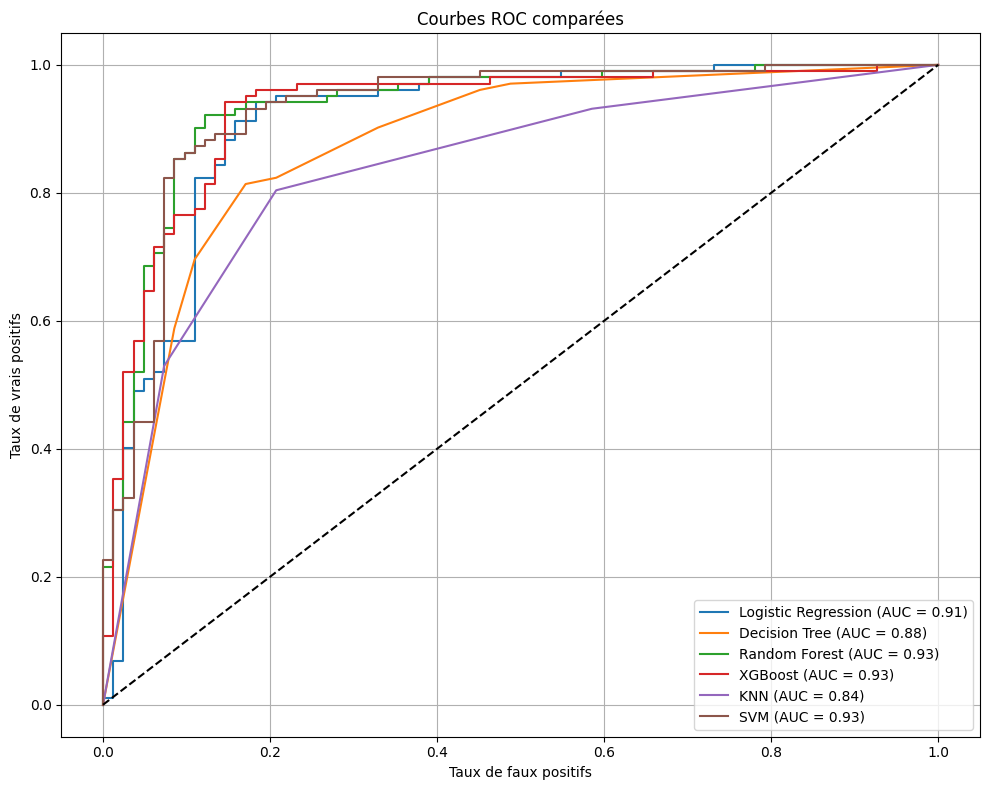

In [60]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models = {
    'Logistic Regression': best_model,
    'Decision Tree': best_tree,
    'Random Forest': best_rf,
    'XGBoost': best_xgb,
    'KNN': best_knn,
    'SVM': best_svm
}


plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Prédictions des probabilités
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        # Pour SVM avec decision_function
        y_prob = model.decision_function(X_test)
        y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())  # normalisation

    # Calcul courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Affichage courbe
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Diagonale
plt.plot([0, 1], [0, 1], 'k--')

# Mise en forme
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC comparées')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()